### Decision Tree with Depth 80

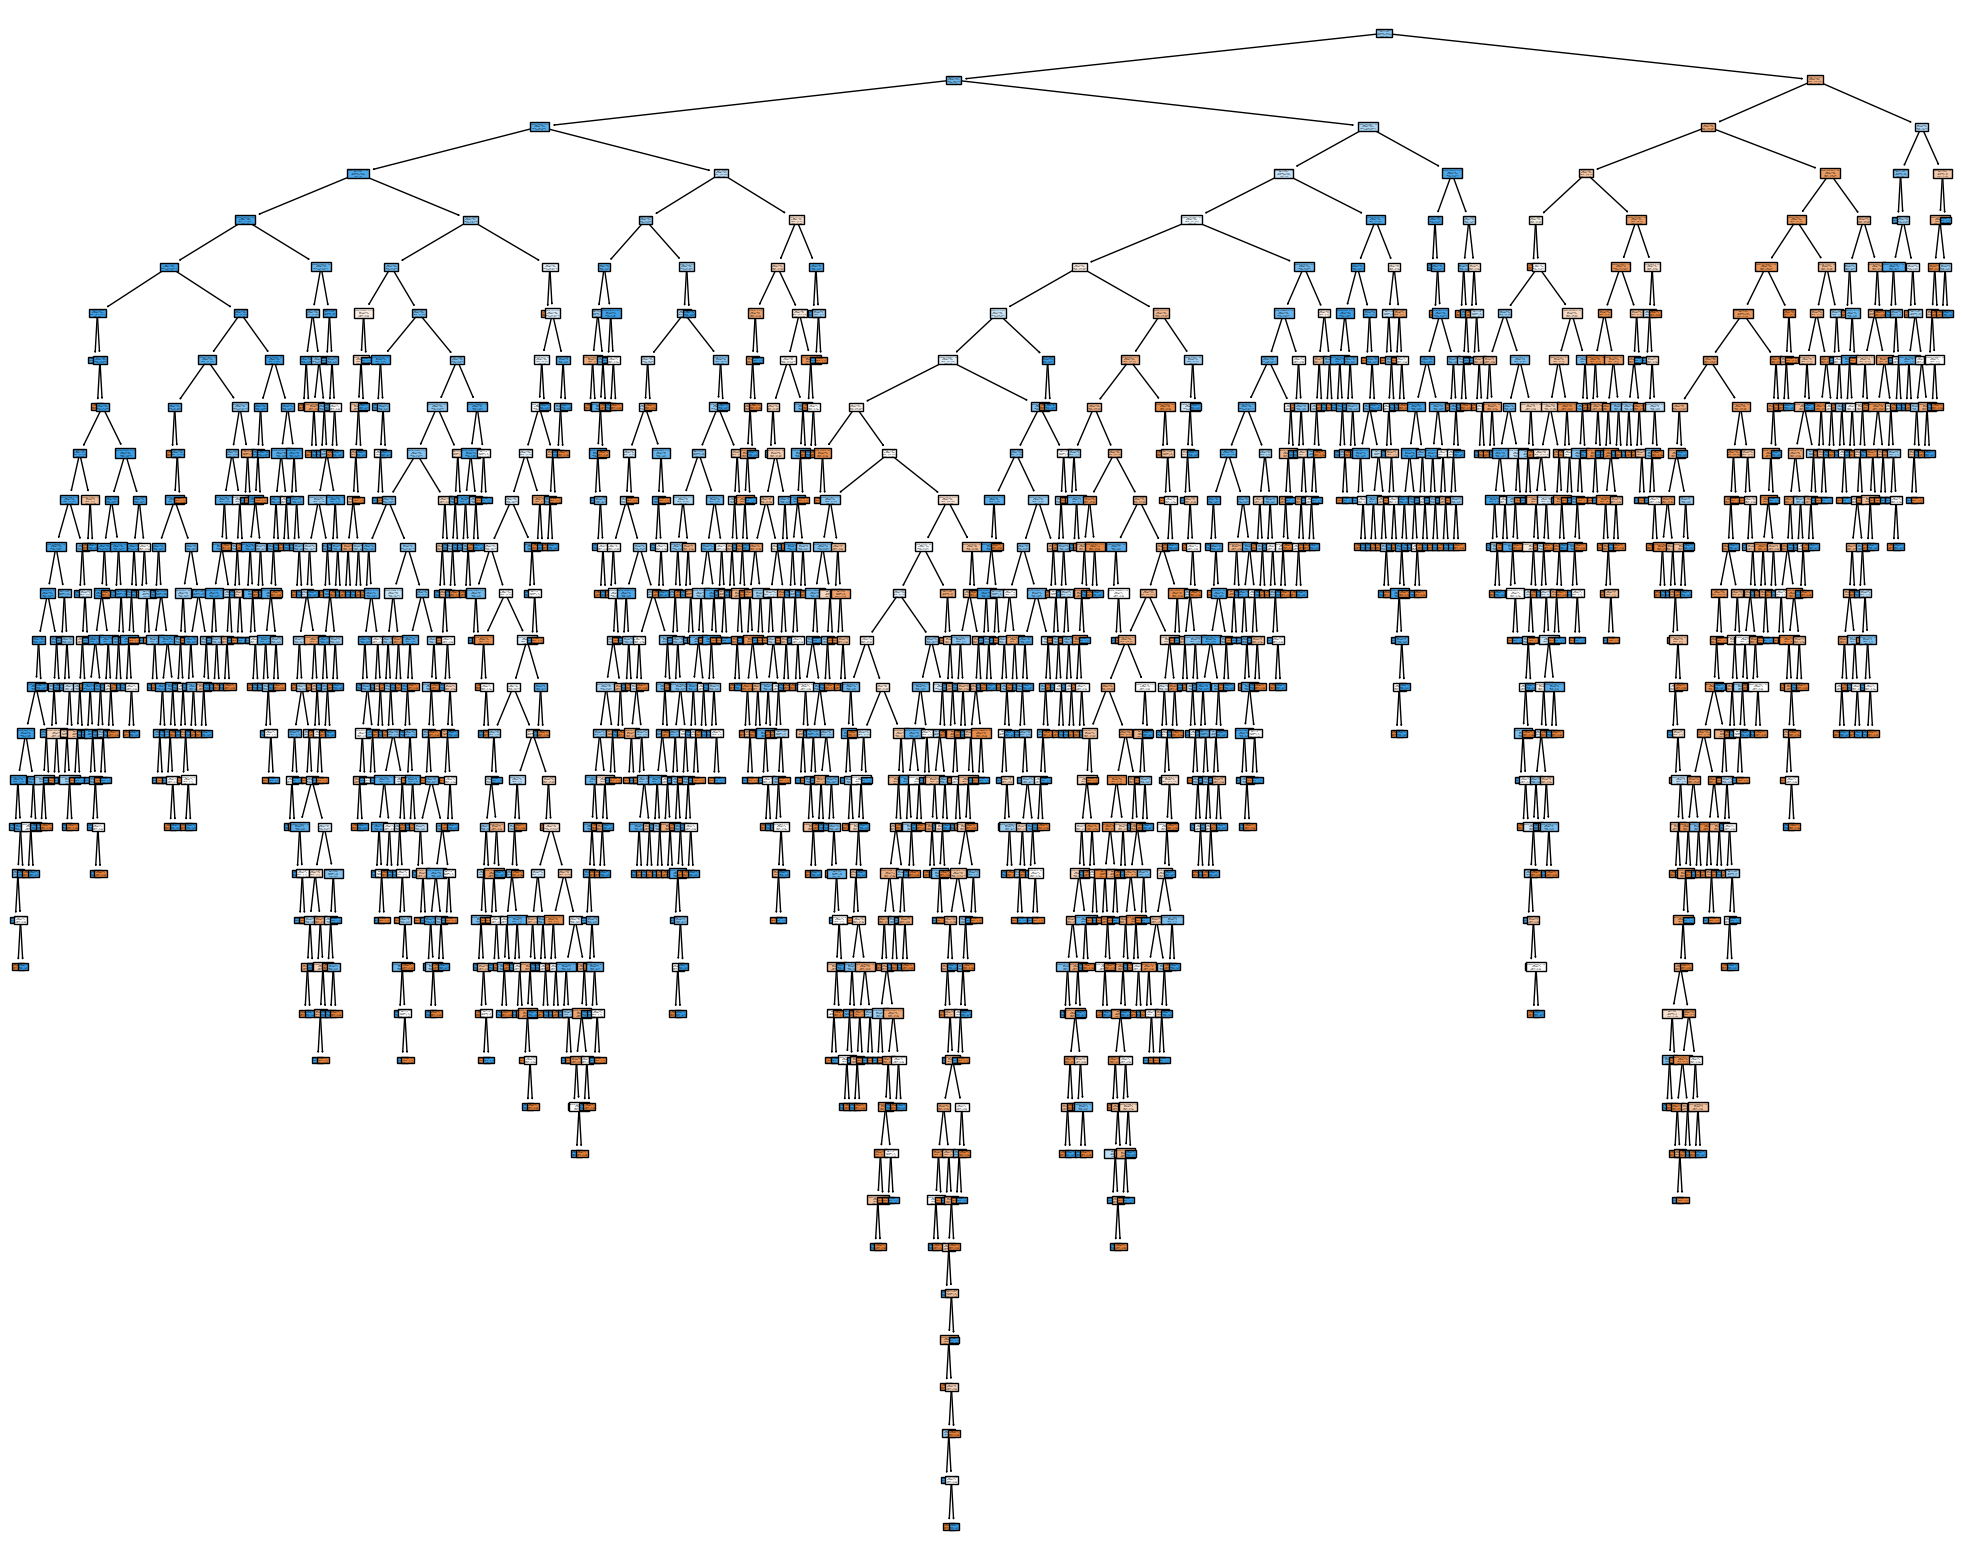

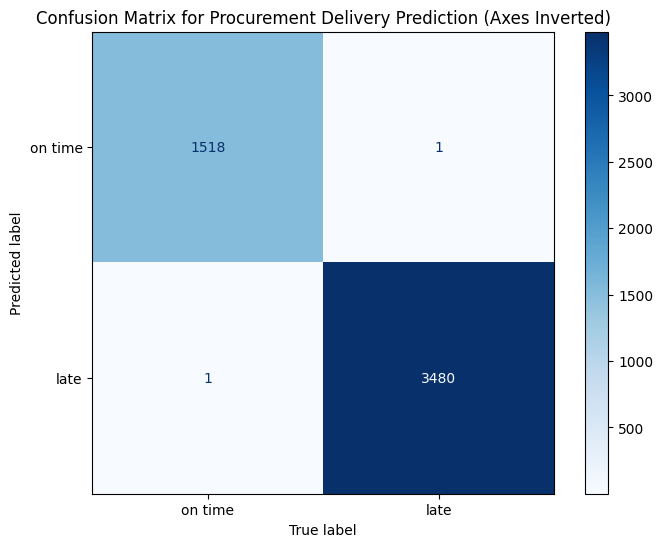

Accuracy: 99.96 %
Precision: 99.97 %
Sensitivity: 99.97 %


In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier , plot_tree
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score , precision_score , recall_score
import os
from datetime import datetime

# Set the run ID and current date for file naming
runID = 'DT_80_All_Features_'
now_str = datetime.now().strftime("%Y%m%d")

# Load the datasets
customer = pd.read_excel('customer.xlsx');
logistic_partners = pd.read_excel('logistic_partner.xlsx');
transactions = pd.read_excel('sales_transactions_star_schema.xlsx');
materials = pd.read_excel('material.xlsx');
warehouse = pd.read_excel('warehouse.xlsx');

# Convert date columns to datetime.date format
transactions["requested_date"]= pd.to_datetime(transactions["requested_date"]).dt.date;
transactions["received_date"]= pd.to_datetime(transactions["received_date"]).dt.date;

# Create a new column to indicate if the transaction is late
transactions["late"]= transactions["requested_date"] < pd.to_datetime(transactions["received_date"])

# Extract weekday and month names from the date columns
transactions["Weekday"] = pd.to_datetime(transactions["requested_date"]).dt.day_name()
transactions["Months"] = pd.to_datetime(transactions["received_date"]).dt.month_name()

# Convert categorical variables to dummy variables
transactions2 = pd.get_dummies(transactions, columns=['Weekday'])
transactions2 = pd.get_dummies(transactions2, columns=['Months'])

# Define the features to be used in the model

features = ['quantity','price'] + [col for col in transactions2.columns if col.startswith('Months_')] + [col for col in transactions2.columns if col.startswith('Weekday_')];

# Train a Decision Tree Classifier
tree = DecisionTreeClassifier(max_depth=80)
tree.fit(X = transactions2[features], y = transactions2['late'])

# Make predictions on the training data
plt.figure(figsize=(25,20))
plot_tree(tree, feature_names=features, class_names=['on time','late'], filled=True)
plt.tight_layout
plt.savefig('Decision_Trees/'+runID+'decision_tree_v_'+now_str+'.png', dpi=300, bbox_inches='tight')
plt.show()

# Evaluate the model using confusion matrix
y_pred = tree.predict(transactions2[features])
y_true = transactions2['late']
cm = confusion_matrix(y_true, y_pred)
cm_transposed = cm.T

# Create a confusion matrix display with transposed axes
disp = ConfusionMatrixDisplay(confusion_matrix=cm_transposed, 
                             display_labels=['on time', 'late'])

# Create a figure and plot
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues')
plt.xlabel('True label')  # This will now be on the x-axis
plt.ylabel('Predicted label')  # This will now be on the y-axis
plt.title('Confusion Matrix for Procurement Delivery Prediction (Axes Inverted)')
plt.savefig('Confusion_matrix/'+runID+'confusion_matrix_v_'+now_str+'.png', dpi=300, bbox_inches='tight')
plt.show()

accuracy = accuracy_score(y_true = y_true , y_pred = y_pred)
precision = precision_score(y_true = y_true , y_pred = y_pred)
sensitivity = recall_score(y_true = y_true , y_pred = y_pred)

print (f"Accuracy: {accuracy * 100:.2f} %")
print (f"Precision: {precision * 100:.2f} %")
print (f"Sensitivity: {sensitivity * 100:.2f} %")   

output_text = (
    f"Accuracy: {accuracy * 100:.2f} %\n"
    f"Precision: {precision * 100:.2f} %\n"
    f"Sensitivity: {sensitivity * 100:.2f} %"
)

# Create a figure
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')  # Hide axes
plt.text(0.01, 0.5, output_text, fontsize=14, va='center', ha='left')
plt.savefig(f'Performance_Measurement/{runID}metrics_output_{now_str}.png', bbox_inches='tight', dpi=300)
plt.close()


### Decision Tree with Depth 25

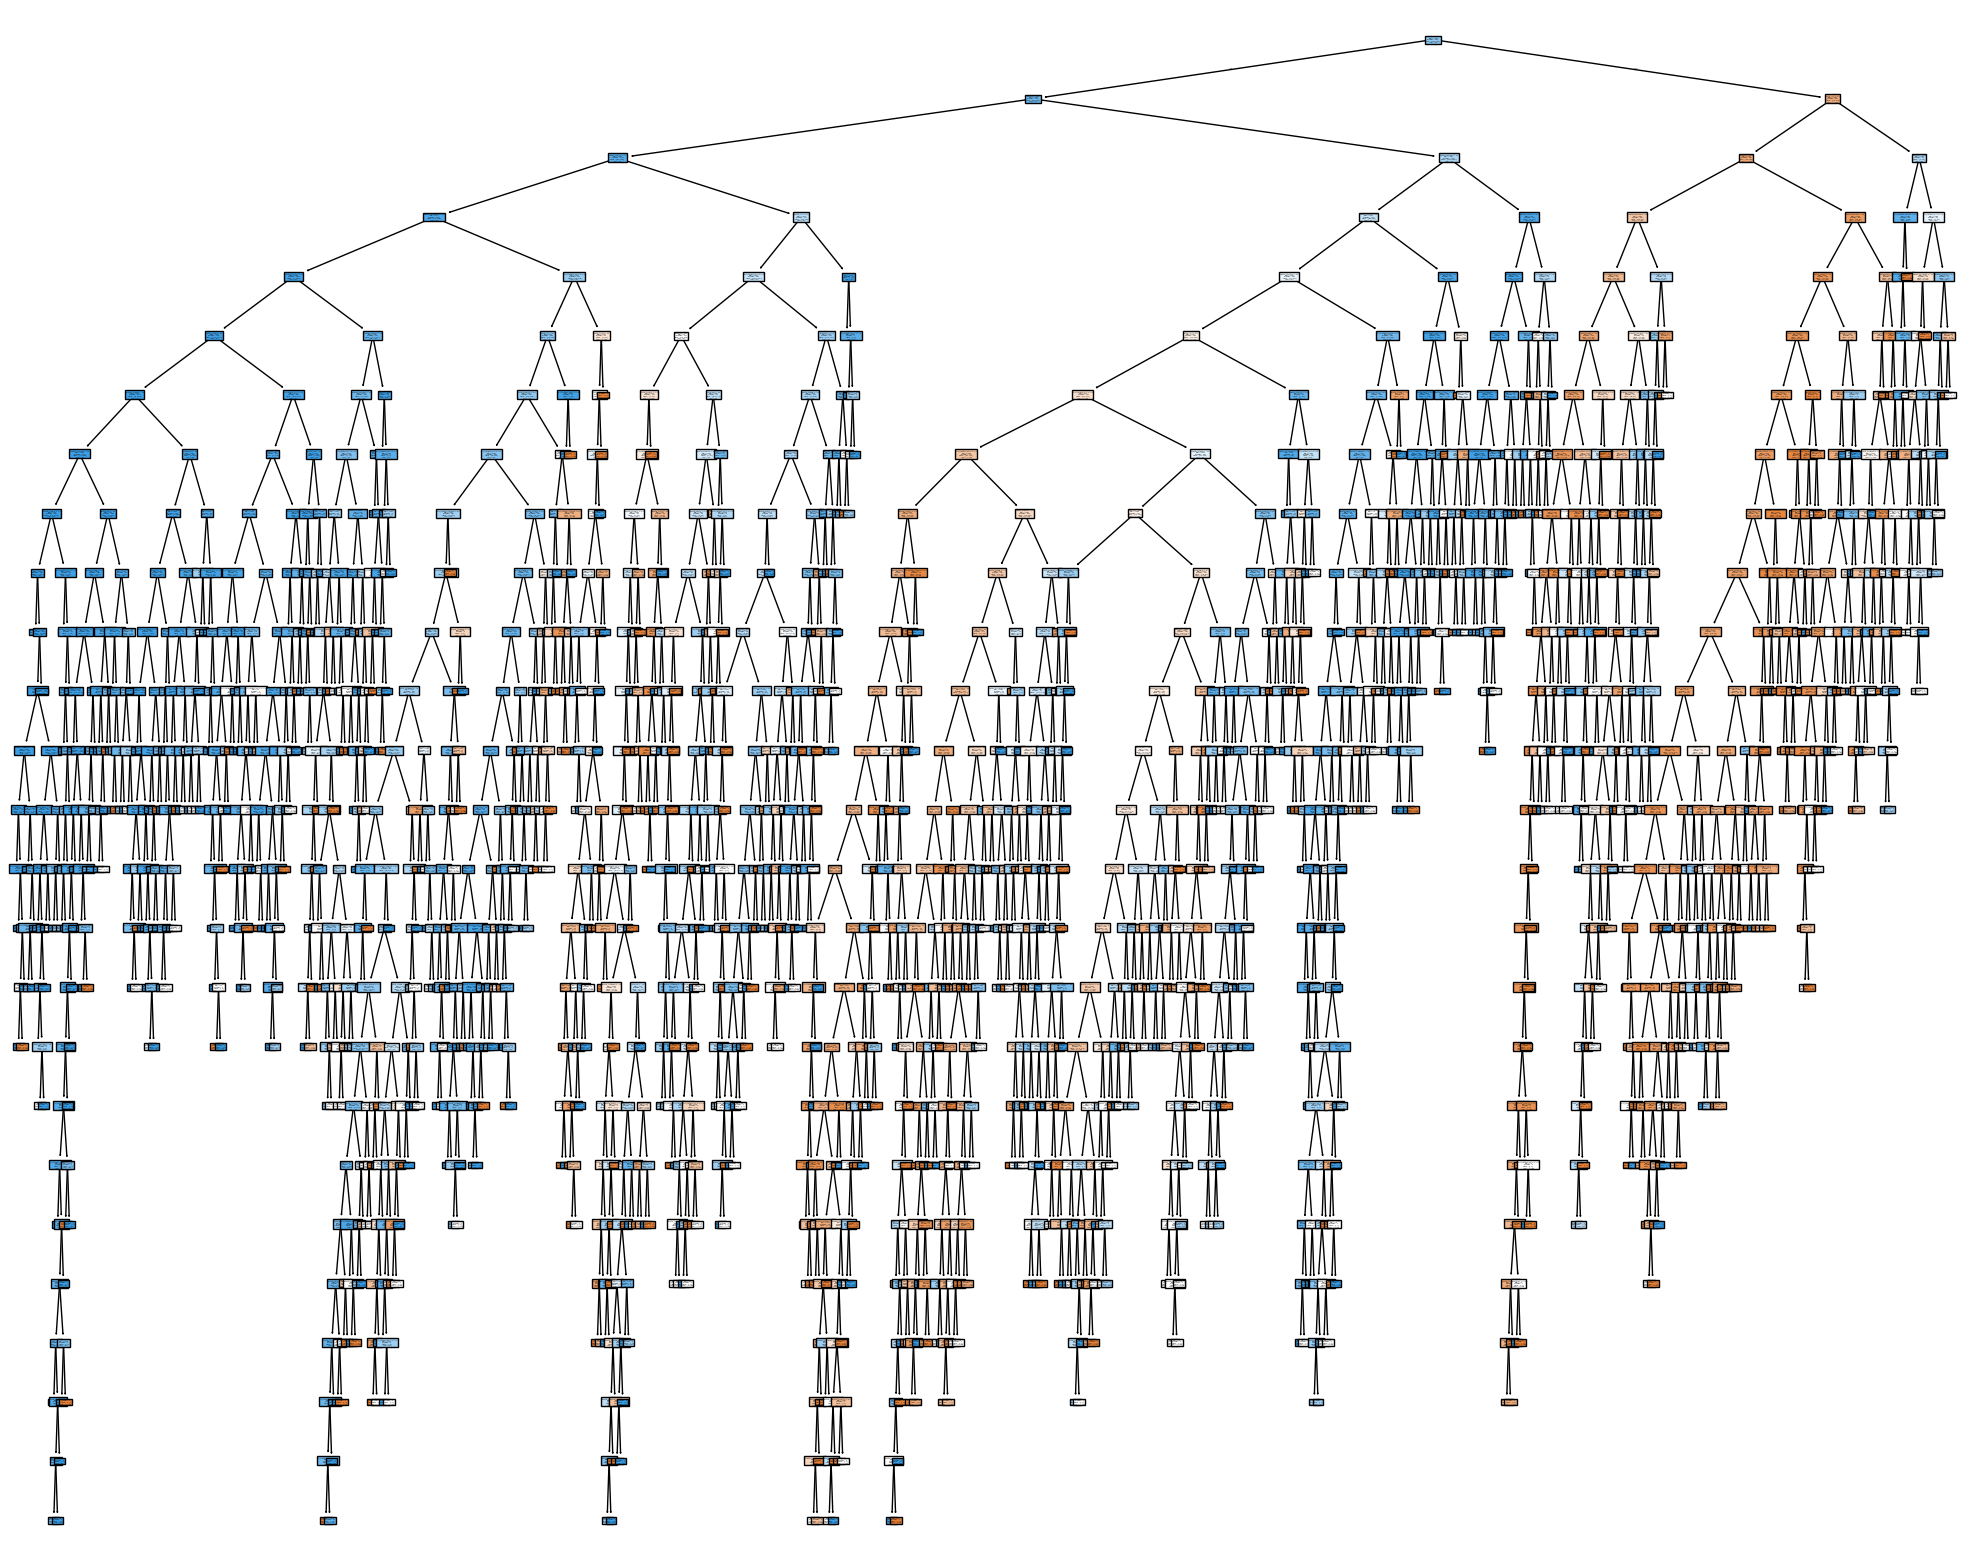

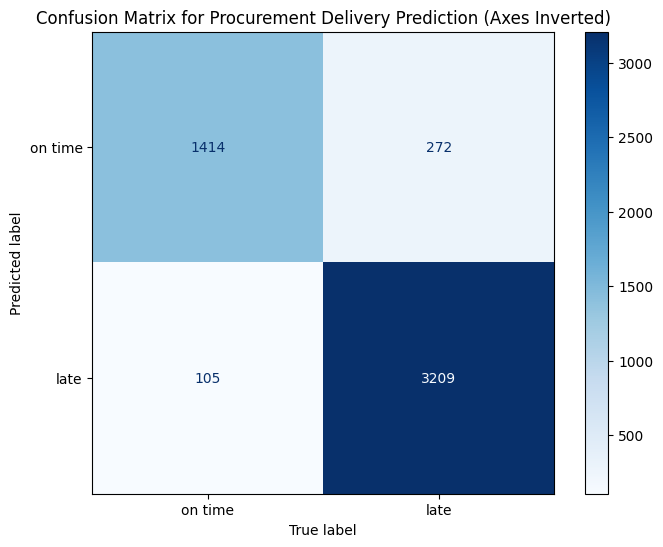

Accuracy: 92.46 %
Precision: 96.83 %
Sensitivity: 92.19 %


In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier , plot_tree
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score , precision_score , recall_score
import os
from datetime import datetime

# Set the run ID and current date for file naming
runID = 'DT_25_Price_Catagorized_'
now_str = datetime.now().strftime("%Y%m%d")

# Load the datasets
customer = pd.read_excel('customer.xlsx');
logistic_partners = pd.read_excel('logistic_partner.xlsx');
transactions = pd.read_excel('sales_transactions_star_schema.xlsx');
materials = pd.read_excel('material.xlsx');
warehouse = pd.read_excel('warehouse.xlsx');

# Convert date columns to datetime.date format
transactions["requested_date"]= pd.to_datetime(transactions["requested_date"]).dt.date;
transactions["received_date"]= pd.to_datetime(transactions["received_date"]).dt.date;

# Create a new column to indicate if the transaction is late
transactions["late"]= transactions["requested_date"] < pd.to_datetime(transactions["received_date"])

# Extract weekday and month names from the date columns
transactions["Weekday"] = pd.to_datetime(transactions["requested_date"]).dt.day_name()
transactions["Months"] = pd.to_datetime(transactions["received_date"]).dt.month_name()

# Convert categorical variables to dummy variables
transactions2 = pd.get_dummies(transactions, columns=['Weekday'])
transactions2 = pd.get_dummies(transactions2, columns=['Months'])

# Create price categories
# Define bins and labels for price categories   

bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220]
labels = [
        '0-20', '20-40', '40-60', '60-80', '80-100',
        '100-120', '120-140', '140-160', '160-180', '180-200', '200-220'
    ]
transactions2['price_category'] = pd.cut(transactions2['price'], bins=bins, labels=labels, right=False)

# Convert price categories to dummy variables
transactions3 = pd.get_dummies(transactions2, columns=['price_category'])

# Define the features to be used in the model

features = (['quantity'] + 
[col for col in transactions3.columns if col.startswith('Months_')] + 
[col for col in transactions3.columns if col.startswith('Weekday_')] +
[col for col in transactions3.columns if col.startswith('price_category_')]);

# Train a Decision Tree Classifier
tree = DecisionTreeClassifier(max_depth=25)
tree.fit(X = transactions3[features], y = transactions3['late'])

# Make predictions on the training data
plt.figure(figsize=(25,20))
plot_tree(tree, feature_names=features, class_names=['on time','late'], filled=True)
plt.tight_layout
plt.savefig('Decision_Trees/'+runID+'decision_tree_v_'+now_str+'.png', dpi=300, bbox_inches='tight')

plt.show()

# Evaluate the model using confusion matrix
y_pred = tree.predict(transactions3[features])
y_true = transactions3['late']
cm = confusion_matrix(y_true, y_pred)
cm_transposed = cm.T

# Create a confusion matrix display with transposed axes
disp = ConfusionMatrixDisplay(confusion_matrix=cm_transposed, 
                             display_labels=['on time', 'late'])

# Create a figure and plot
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues')
plt.xlabel('True label')  # This will now be on the x-axis
plt.ylabel('Predicted label')  # This will now be on the y-axis
plt.title('Confusion Matrix for Procurement Delivery Prediction (Axes Inverted)')
plt.savefig('Confusion_matrix/'+runID+'confusion_matrix_v_'+now_str+'.png', dpi=300, bbox_inches='tight')
plt.show()

accuracy = accuracy_score(y_true = y_true , y_pred = y_pred)
precision = precision_score(y_true = y_true , y_pred = y_pred)
sensitivity = recall_score(y_true = y_true , y_pred = y_pred)

print (f"Accuracy: {accuracy * 100:.2f} %")
print (f"Precision: {precision * 100:.2f} %")
print (f"Sensitivity: {sensitivity * 100:.2f} %")   

output_text = (
    f"Accuracy: {accuracy * 100:.2f} %\n"
    f"Precision: {precision * 100:.2f} %\n"
    f"Sensitivity: {sensitivity * 100:.2f} %"
)

# Create a figure
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')  # Hide axes
plt.text(0.01, 0.5, output_text, fontsize=14, va='center', ha='left')
plt.savefig(f'Performance_Measurement/{runID}metrics_output_{now_str}.png', bbox_inches='tight', dpi=300)
plt.close()


### Random Forest  with Depth 25

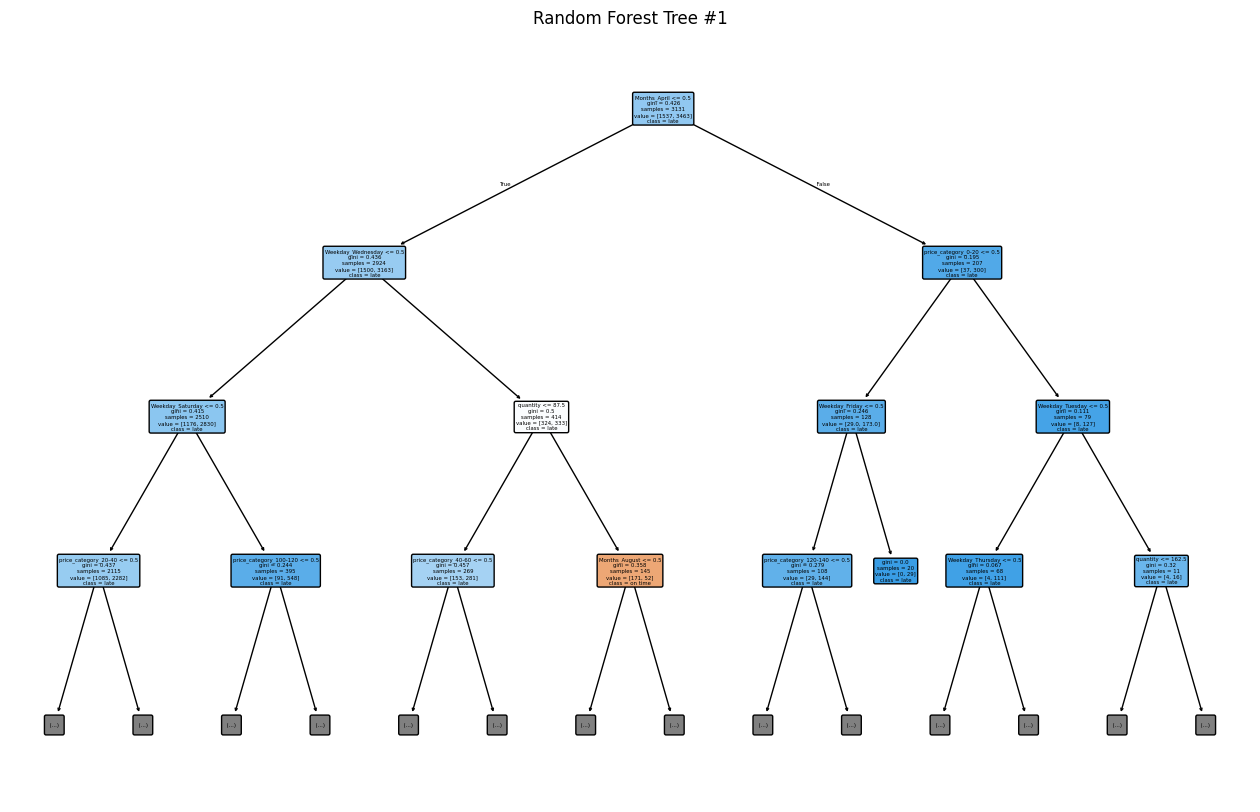

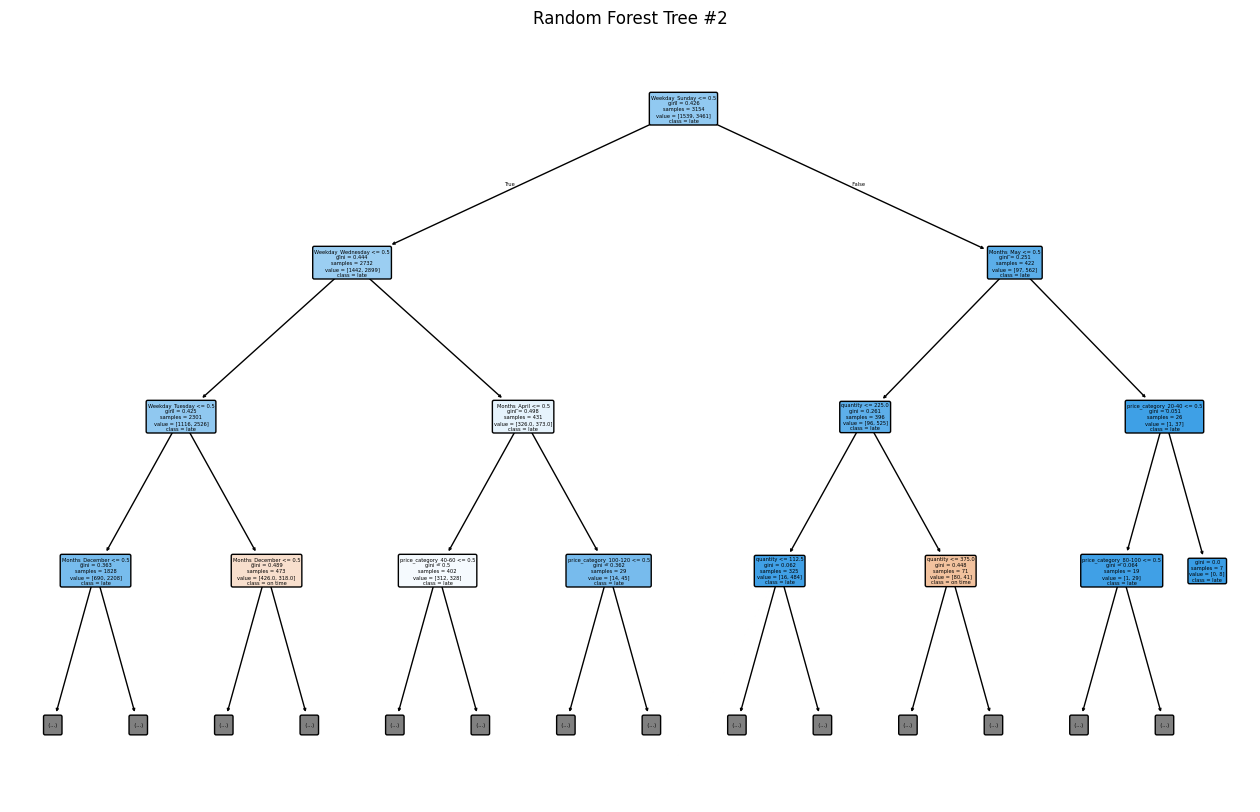

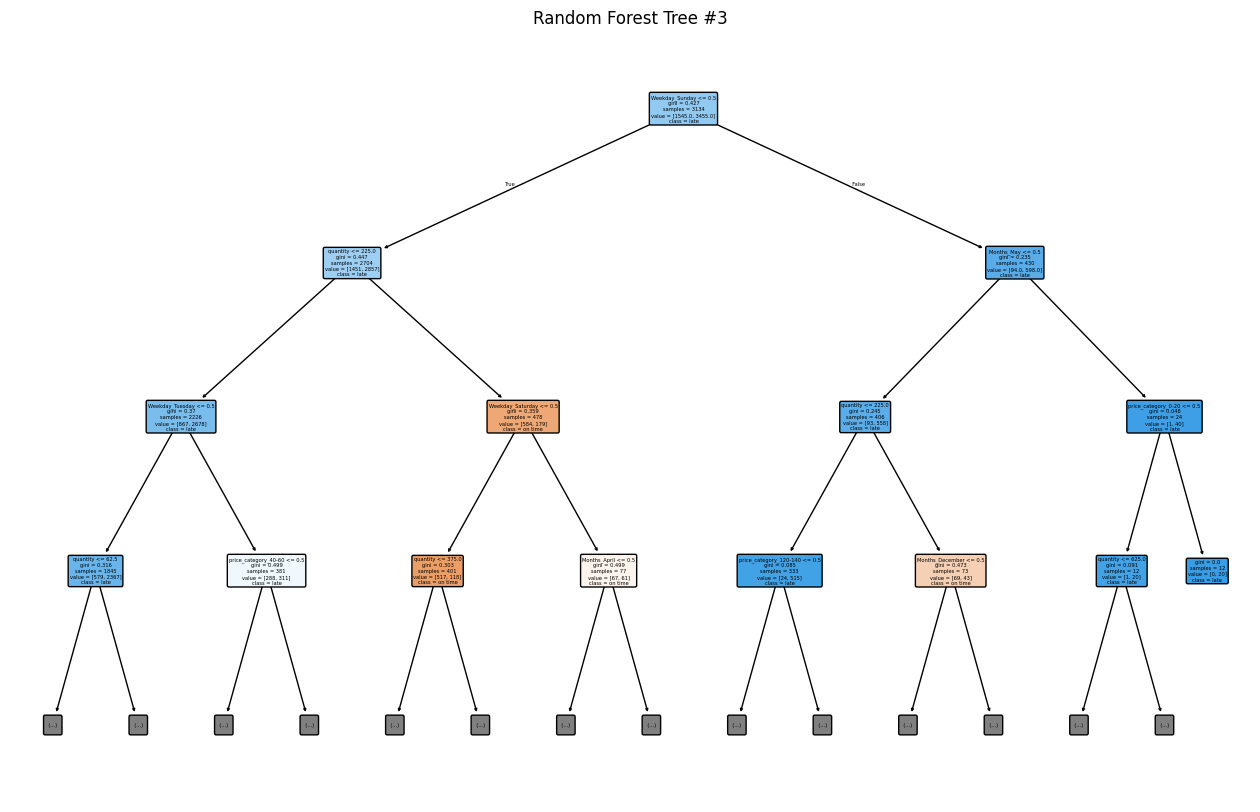

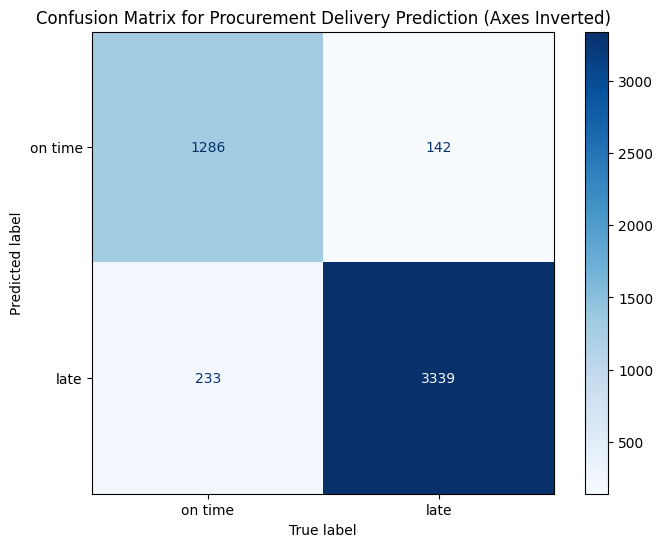

Accuracy: 92.50 %
Precision: 93.48 %
Sensitivity: 95.92 %


In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score , precision_score , recall_score
import os
from datetime import datetime

# Set the run ID and current date for file naming
runID = 'RF_25_Price_Catagorized_'
now_str = datetime.now().strftime("%Y%m%d")

# Load the datasets
customer = pd.read_excel('customer.xlsx');
logistic_partners = pd.read_excel('logistic_partner.xlsx');
transactions = pd.read_excel('sales_transactions_star_schema.xlsx');
materials = pd.read_excel('material.xlsx');
warehouse = pd.read_excel('warehouse.xlsx');

# Convert date columns to datetime.date format
transactions["requested_date"]= pd.to_datetime(transactions["requested_date"]).dt.date;
transactions["received_date"]= pd.to_datetime(transactions["received_date"]).dt.date;

# Create a new column to indicate if the transaction is late
transactions["late"]= transactions["requested_date"] < pd.to_datetime(transactions["received_date"])

# Extract weekday and month names from the date columns
transactions["Weekday"] = pd.to_datetime(transactions["requested_date"]).dt.day_name()
transactions["Months"] = pd.to_datetime(transactions["received_date"]).dt.month_name()

# Convert categorical variables to dummy variables
transactions2 = pd.get_dummies(transactions, columns=['Weekday'])
transactions2 = pd.get_dummies(transactions2, columns=['Months'])

# Create price categories
# Define bins and labels for price categories   

bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220]
labels = [
        '0-20', '20-40', '40-60', '60-80', '80-100',
        '100-120', '120-140', '140-160', '160-180', '180-200', '200-220'
    ]
transactions2['price_category'] = pd.cut(transactions2['price'], bins=bins, labels=labels, right=False)

# Convert price categories to dummy variables
transactions3 = pd.get_dummies(transactions2, columns=['price_category'])

# Define the features to be used in the model

features = (['quantity'] + 
[col for col in transactions3.columns if col.startswith('Months_')] + 
[col for col in transactions3.columns if col.startswith('Weekday_')] +
[col for col in transactions3.columns if col.startswith('price_category_')]);

# Train a Decision Tree Classifier
# tree = DecisionTreeClassifier(max_depth=25)
# tree.fit(X = transactions3[features], y = transactions3['late'])

# Train a Random Forest Classifier with depth of 25
rf = RandomForestClassifier(n_estimators=100, max_depth=25)
rf.fit(X=transactions3[features], y=transactions['late'])


# Plot the first 3 trees in the random forest

for i in range(3):
    plt.figure(figsize=(16, 10))
    plot_tree(
        rf.estimators_[i],
        feature_names=features,
        class_names=['on time', 'late'],
        filled=True,
        rounded=True,
        max_depth=3  # Optional: limit depth for readability
    )
    plt.title(f"Random Forest Tree #{i+1}")
    plt.show()


# Make predictions on the training data

# Evaluate the model using confusion matrix
rf_pred = rf.predict(transactions3[features])
y_true = transactions3['late']
cm = confusion_matrix(y_true, rf_pred)
cm_transposed = cm.T

# Create a confusion matrix display with transposed axes
disp = ConfusionMatrixDisplay(confusion_matrix=cm_transposed, 
                             display_labels=['on time', 'late'])

# Create a figure and plot
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues')
plt.xlabel('True label')  # This will now be on the x-axis
plt.ylabel('Predicted label')  # This will now be on the y-axis
plt.title('Confusion Matrix for Procurement Delivery Prediction (Axes Inverted)')
plt.savefig('Confusion_matrix/'+runID+'confusion_matrix_v_'+now_str+'.png', dpi=300, bbox_inches='tight')
plt.show()

accuracy = accuracy_score(y_true = y_true , y_pred = rf_pred)
precision = precision_score(y_true = y_true , y_pred = rf_pred)
sensitivity = recall_score(y_true = y_true , y_pred = rf_pred)

print (f"Accuracy: {accuracy * 100:.2f} %")
print (f"Precision: {precision * 100:.2f} %")
print (f"Sensitivity: {sensitivity * 100:.2f} %")   

output_text = (
    f"Accuracy: {accuracy * 100:.2f} %\n"
    f"Precision: {precision * 100:.2f} %\n"
    f"Sensitivity: {sensitivity * 100:.2f} %"
)

# Create a figure
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')  # Hide axes
plt.text(0.01, 0.5, output_text, fontsize=14, va='center', ha='left')
plt.savefig(f'Performance_Measurement/{runID}metrics_output_{now_str}.png', bbox_inches='tight', dpi=300)
plt.close()


### Gradiant Boost with Depth 25

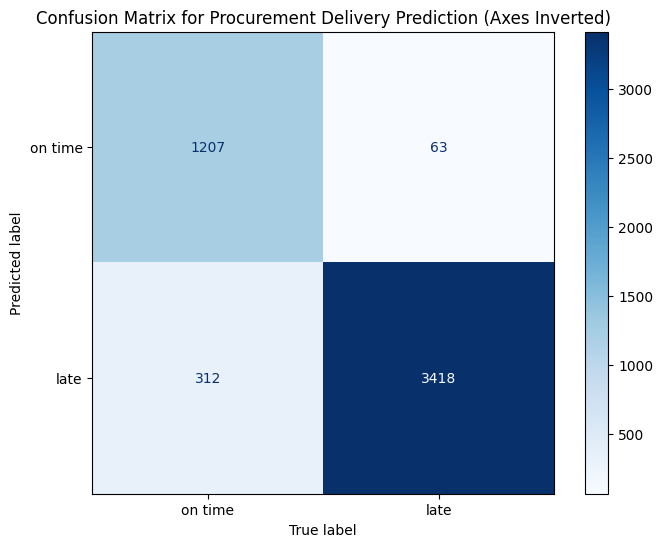

Accuracy: 92.50 %
Precision: 91.64 %
Sensitivity: 98.19 %


In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score , precision_score , recall_score
import os
from datetime import datetime

# Set the run ID and current date for file naming
runID = 'GB_25_Price_Catagorized_'
now_str = datetime.now().strftime("%Y%m%d")

# Load the datasets
customer = pd.read_excel('customer.xlsx');
logistic_partners = pd.read_excel('logistic_partner.xlsx');
transactions = pd.read_excel('sales_transactions_star_schema.xlsx');
materials = pd.read_excel('material.xlsx');
warehouse = pd.read_excel('warehouse.xlsx');

# Convert date columns to datetime.date format
transactions["requested_date"]= pd.to_datetime(transactions["requested_date"]).dt.date;
transactions["received_date"]= pd.to_datetime(transactions["received_date"]).dt.date;

# Create a new column to indicate if the transaction is late
transactions["late"]= transactions["requested_date"] < pd.to_datetime(transactions["received_date"])

# Extract weekday and month names from the date columns
transactions["Weekday"] = pd.to_datetime(transactions["requested_date"]).dt.day_name()
transactions["Months"] = pd.to_datetime(transactions["received_date"]).dt.month_name()

# Convert categorical variables to dummy variables
transactions2 = pd.get_dummies(transactions, columns=['Weekday'])
transactions2 = pd.get_dummies(transactions2, columns=['Months'])

# Create price categories
# Define bins and labels for price categories   

bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220]
labels = [
        '0-20', '20-40', '40-60', '60-80', '80-100',
        '100-120', '120-140', '140-160', '160-180', '180-200', '200-220'
    ]
transactions2['price_category'] = pd.cut(transactions2['price'], bins=bins, labels=labels, right=False)

# Convert price categories to dummy variables
transactions3 = pd.get_dummies(transactions2, columns=['price_category'])

# Define the features to be used in the model

features = (['quantity'] + 
[col for col in transactions3.columns if col.startswith('Months_')] + 
[col for col in transactions3.columns if col.startswith('Weekday_')] +
[col for col in transactions3.columns if col.startswith('price_category_')]);

# Train a Gradiant booster Classifier with depth of 25
gbm = GradientBoostingClassifier(n_estimators=100, max_depth=25)
gbm.fit(X=transactions3[features], y=transactions3['late'])

# How to plot trees in Gradient Boosting Classifier?



#plot_tree(tree, feature_names=features, class_names=['on time','late'], filled=True)
#plt.tight_layout
#plt.savefig('Decision_Trees/'+runID+'decision_tree_v_'+now_str+'.png', dpi=300, bbox_inches='tight')
#plt.show()

# Make predictions on the training data
gbm_pred = gbm.predict(transactions3[features])
y_true = transactions3['late']
cm = confusion_matrix(y_true, gbm_pred)
cm_transposed = cm.T

# Create a confusion matrix display with transposed axes
disp = ConfusionMatrixDisplay(confusion_matrix=cm_transposed, 
                             display_labels=['on time', 'late'])

# Create a figure and plot
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues')
plt.xlabel('True label')  # This will now be on the x-axis
plt.ylabel('Predicted label')  # This will now be on the y-axis
plt.title('Confusion Matrix for Procurement Delivery Prediction (Axes Inverted)')
plt.savefig('Confusion_matrix/'+runID+'confusion_matrix_v_'+now_str+'.png', dpi=300, bbox_inches='tight')
plt.show()

accuracy = accuracy_score(y_true = y_true , y_pred = gbm_pred)
precision = precision_score(y_true = y_true , y_pred = gbm_pred)
sensitivity = recall_score(y_true = y_true , y_pred = gbm_pred)

print (f"Accuracy: {accuracy * 100:.2f} %")
print (f"Precision: {precision * 100:.2f} %")
print (f"Sensitivity: {sensitivity * 100:.2f} %")   

output_text = (
    f"Accuracy: {accuracy * 100:.2f} %\n"
    f"Precision: {precision * 100:.2f} %\n"
    f"Sensitivity: {sensitivity * 100:.2f} %"
)

# Create a figure
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')  # Hide axes
plt.text(0.01, 0.5, output_text, fontsize=14, va='center', ha='left')
plt.savefig(f'Performance_Measurement/{runID}metrics_output_{now_str}.png', bbox_inches='tight', dpi=300)
plt.close()
